![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Heatmap DateTime
</b>
</span>

---
**Notebook version**: `1` (25 Mar 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Plots heatmap showing values (z) of time series as date (y) vs time (x).
- Time series must have date and time info in index.
- This example uses 10 years of air temperature measurements, recorded at half-hourly time resolution.
- Since this class uses diive's `TimestampSanitizer` class, it is important that the timestamp of the input data is correctly named, i.e., `TIMESTAMP_START`, `TIMESTAMP_MIDDLE` or `TIMESTAMP_END`.
- These timestamp names are strictly required, because a timestamp index simply named `TIMESTAMP` does not give info about start and end of the respective averaging interval.
- `HeatmapDateTime` uses `HeatmapBase` (`diive.core.plotting.heatmap_base.HeatmapBase`) as base class.

</br>

# **Imports**

In [1]:
import importlib.metadata
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)
from diive.configs.exampledata import load_exampledata_parquet
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.72.0


In [2]:
help(HeatmapDateTime)

Help on class HeatmapDateTime in module diive.core.plotting.heatmap_datetime:

class HeatmapDateTime(diive.core.plotting.heatmap_base.HeatmapBase)
 |  HeatmapDateTime(series: pandas.core.series.Series, fig=None, ax=None, title: str = None, vmin: float = None, vmax: float = None, cb_digits_after_comma: int = 2, cb_labelsize: float = 16, axlabels_fontsize: float = 16, ticks_labelsize: float = 16, minyticks: int = 3, maxyticks: int = 10, cmap: str = 'RdYlBu_r', color_bad: str = 'grey', zlabel: str = 'Value', figsize: tuple = (6, 10.7), verbose: bool = False)
 |  
 |  Method resolution order:
 |      HeatmapDateTime
 |      diive.core.plotting.heatmap_base.HeatmapBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, series: pandas.core.series.Series, fig=None, ax=None, title: str = None, vmin: float = None, vmax: float = None, cb_digits_after_comma: int = 2, cb_labelsize: float = 16, axlabels_fontsize: float = 16, ticks_labelsize: float = 16, minyticks: int = 

</br>

# **Load example data**

In [3]:
df = load_exampledata_parquet()
series_30min = df['Tair_f']
series_30min

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.056 seconds). Detected time resolution of <30 * Minutes> / 30T 


TIMESTAMP_MIDDLE
2013-01-01 00:15:00   -1.618000
2013-01-01 00:45:00   -1.630000
2013-01-01 01:15:00   -1.644000
2013-01-01 01:45:00   -1.657000
2013-01-01 02:15:00   -0.567000
                         ...   
2022-12-31 21:45:00    3.463333
2022-12-31 22:15:00    5.283333
2022-12-31 22:45:00    5.536667
2022-12-31 23:15:00    4.963333
2022-12-31 23:45:00    6.490000
Freq: 30T, Name: Tair_f, Length: 175296, dtype: float64

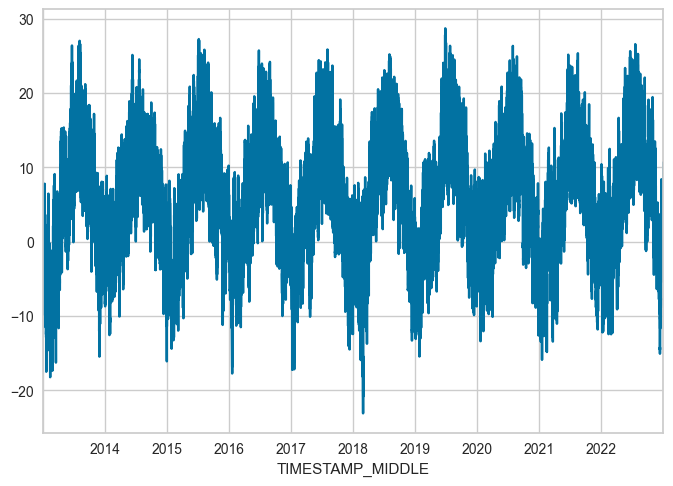

In [4]:
series_30min.plot();

</br>

# (1) **Plot heatmap with half-hourly data**

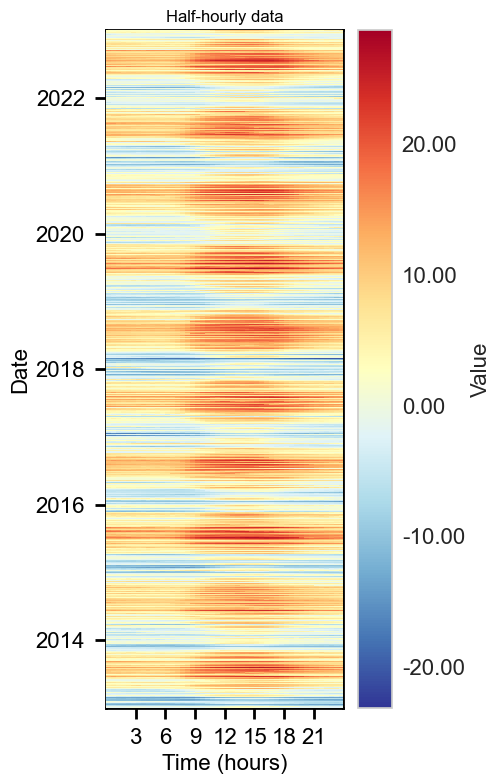

In [5]:
hm = HeatmapDateTime(
    series=series_30min,
    title="Half-hourly data",    
    figsize=(5, 8)
)
hm.show()

## Get ax in which the plot was generated

In [6]:
this_ax = hm.get_ax()
this_ax

<Axes: title={'center': 'Half-hourly data'}, xlabel='Time (hours)', ylabel='Date'>

## Get data that was used to create the plot

In [7]:
plot_df = hm.get_plot_data()
plot_df

x_vals,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,05:00:00,05:30:00,06:00:00,06:30:00,07:00:00,...,16:30:00,17:00:00,17:30:00,18:00:00,18:30:00,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
y_vals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,-1.618000,-1.630000,-1.644000,-1.657000,-0.567000,-0.200000,-0.100000,-0.300000,-1.600000,-1.267000,-1.700000,-1.400000,-2.267000,-1.900000,-1.067000,...,-0.167000,-0.400000,-1.333000,-1.333000,-1.800000,-2.100000,-1.833000,-1.733000,-1.667000,-1.600000,-1.800000,-1.867000,-2.133000,-2.433000,-2.100000
2013-01-02,-2.333000,-3.100000,-3.567000,-3.600000,-3.800000,-3.833000,-4.100000,-4.133000,-3.933000,-4.067000,-4.200000,-3.967000,-4.033000,-4.033000,-3.967000,...,-4.600000,-4.933000,-5.467000,-6.100000,-6.100000,-7.233000,-7.667000,-7.600000,-8.067000,-8.367000,-9.033000,-8.900000,-8.833000,-8.467000,-9.233000
2013-01-03,-9.133000,-9.167000,-9.267000,-9.100000,-9.433000,-9.767000,-8.900000,-9.167000,-9.267000,-8.333000,-8.633000,-7.833000,-7.700000,-7.733000,-7.333000,...,0.467000,0.333000,0.567000,0.267000,0.000000,-0.733000,-1.100000,-1.367000,-2.200000,-2.633000,-2.367000,-1.800000,-2.033000,-2.233000,-1.967000
2013-01-04,-1.367000,-0.400000,-1.100000,-0.433000,-0.367000,-0.233000,0.233000,0.433000,0.500000,0.667000,0.700000,0.767000,1.667000,1.333000,0.800000,...,1.067000,0.800000,1.000000,0.700000,0.533000,0.567000,0.833000,0.533000,0.567000,0.467000,0.400000,0.500000,0.267000,0.333000,0.267000
2013-01-05,0.667000,0.067000,0.300000,0.433000,0.767000,0.367000,0.500000,0.767000,0.700000,0.733000,0.467000,0.433000,0.400000,0.933000,0.100000,...,0.167000,-0.433000,-0.033000,0.600000,0.733000,0.567000,0.467000,0.333000,-0.400000,-0.700000,-0.667000,-1.100000,-1.000000,-0.967000,-0.967000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,-0.003333,0.050000,0.080000,0.000000,-0.026667,-0.140000,-0.323333,-0.600000,-0.593333,-0.600000,-0.570000,-0.610000,-0.710000,-0.870000,-0.976667,...,-1.763333,-1.800000,-1.730000,-1.966667,-1.960000,-2.156667,-2.240000,-2.846667,-3.113333,-3.383333,-3.706667,-3.986667,-4.323333,-4.596667,-4.753333
2022-12-28,-5.176667,-5.076667,-4.893333,-4.790000,-5.236667,-5.313333,-4.680000,-4.753333,-4.563333,-4.183333,-4.133333,-4.226667,-4.123333,-4.366667,-4.430000,...,0.726667,0.320000,-0.360000,-0.166667,-0.400000,-0.560000,-1.630000,-1.906667,-2.393333,-1.620000,-1.336667,-0.700000,-1.723333,-1.580000,-1.570000
2022-12-29,-2.126667,-2.166667,-1.873333,-1.883333,-1.856667,-1.796667,-1.876667,-1.960000,-2.060000,-2.303333,-1.806667,-2.180000,-2.080000,-1.300000,-1.883333,...,1.996667,1.983333,1.413333,1.546667,0.770000,0.456667,1.240000,0.813333,1.343333,0.963333,1.680000,1.873333,2.210000,2.110000,1.643333


</br>

# (2) **Plot heatmap with hourly data**

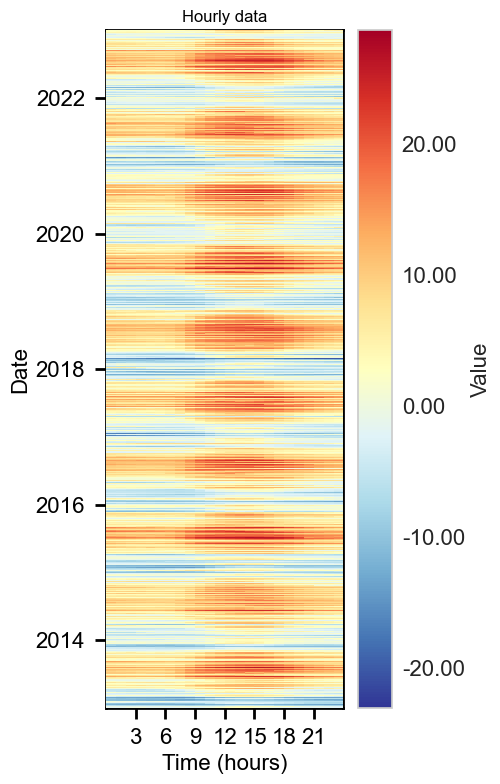

In [8]:
# Resample example data to hourly time resolution
series_1h = series_30min.resample('1h', label='left').mean()

# Resampling creates the label left, therefore the appropriate name of
# the timestamp index is TIMESTAMP_START
series_1h.index.name = 'TIMESTAMP_START'

hm = HeatmapDateTime(
    series=series_1h,
    title="Hourly data",
    figsize=(5, 8)
)
hm.show()

</br>

# (3) **Plot heatmap with 6-hourly data**

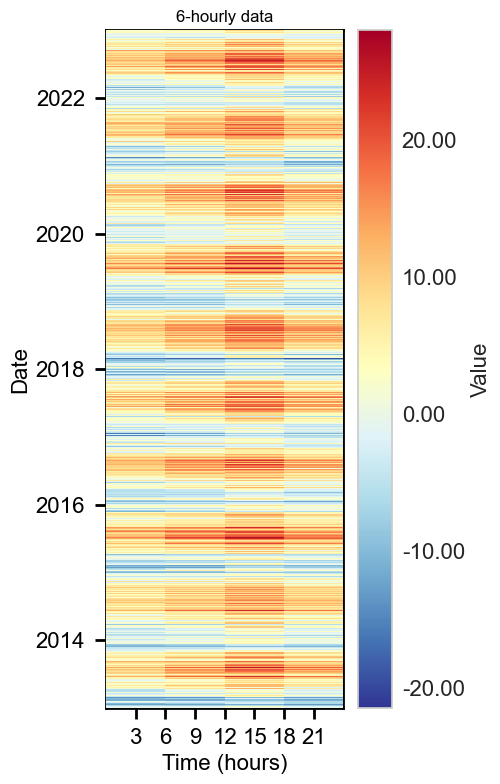

In [9]:
# Resample example data to 6-hourly time resolution
series_6h = series_30min.resample('6h', label='left').mean()

# Resampling creates the label left, therefore the appropriate name of
# the timestamp index is TIMESTAMP_START
series_6h.index.name = 'TIMESTAMP_START'

hm = HeatmapDateTime(
    series=series_6h,
    title="6-hourly data",
    figsize=(5, 8)
)
hm.show()

In [10]:
hm.get_plot_data()

x_vals,00:00:00,06:00:00,12:00:00,18:00:00
y_vals,,,,
2013-01-01,-1.140250,-1.091667,1.119500,-1.866583
2013-01-02,-3.719417,-3.911250,-4.400083,-7.966667
2013-01-03,-9.000000,-4.458333,1.033333,-1.513833
2013-01-04,-0.050000,1.164000,1.583333,0.497250
2013-01-05,0.516750,0.244500,0.536167,-0.258417
...,...,...,...,...
2022-12-27,-0.278056,-0.849167,-1.183056,-3.252778
2022-12-28,-4.752222,-2.753056,1.233611,-1.298889
2022-12-29,-1.990833,-0.775556,2.454444,1.387500


</br>

# (4) **Plot heatmap with 12-hourly data**

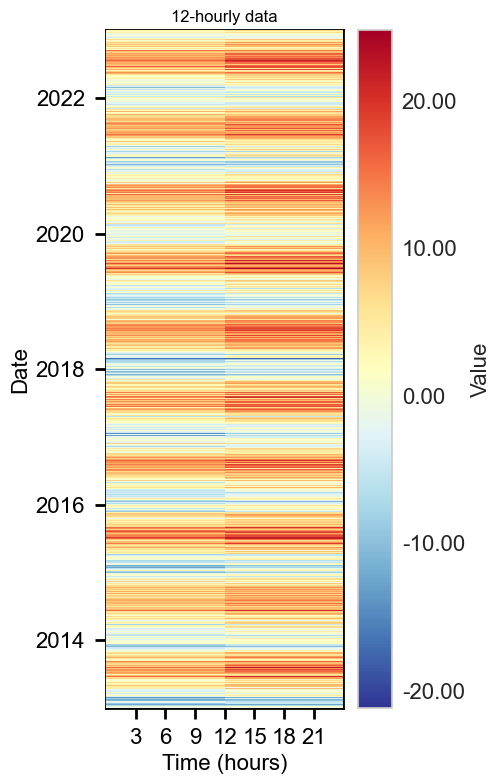

In [11]:
# Resample example data to 12-hourly time resolution
series_12h = series_30min.resample('12h', label='left').mean()

# Resampling creates the label left, therefore the appropriate name of
# the timestamp index is TIMESTAMP_START
series_12h.index.name = 'TIMESTAMP_START'

hm = HeatmapDateTime(
    series=series_12h,
    title="12-hourly data",
    figsize=(5, 8)
)
hm.show()

</br>

# (5) **Plot multiple heatmaps in one figure**

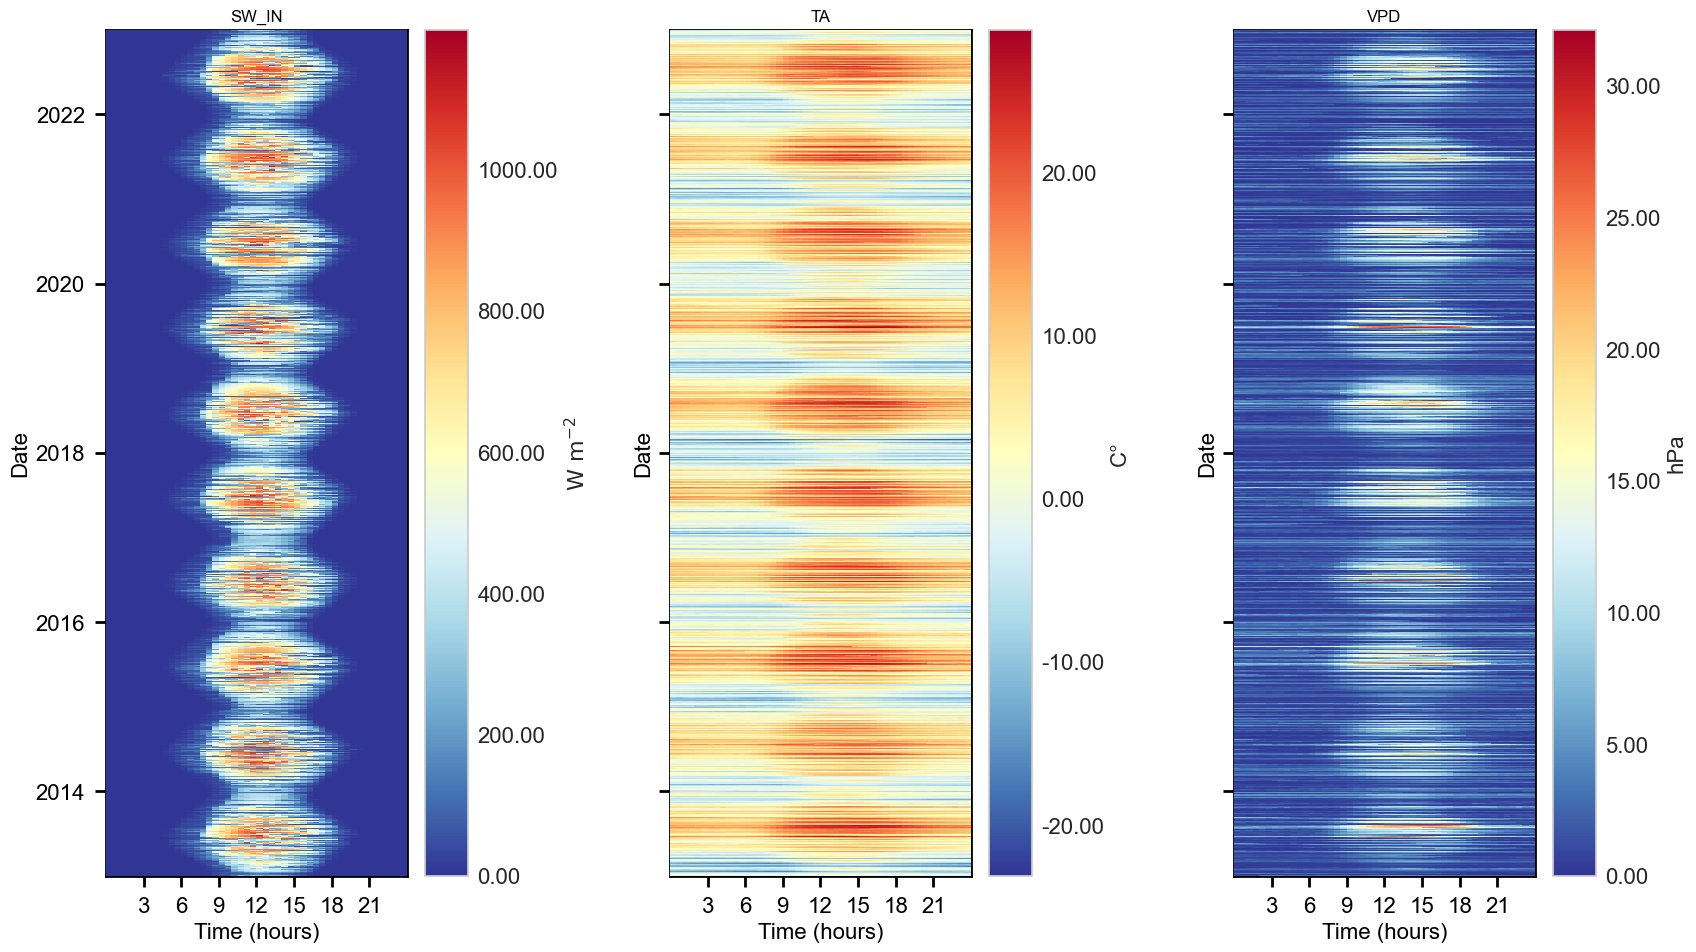

In [12]:
# Figure
fig = plt.figure(facecolor='white', figsize=(16, 9))

# Gridspec for layout
gs = gridspec.GridSpec(1, 3)  # rows, cols
gs.update(wspace=0.5, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax_swin = fig.add_subplot(gs[0, 0])
ax_ta = fig.add_subplot(gs[0, 1])
ax_vpd = fig.add_subplot(gs[0, 2])

HeatmapDateTime(ax=ax_swin, series=df['Rg_f'], zlabel="$\mathrm{W\ m^{-2}}$").plot()
HeatmapDateTime(ax=ax_ta, series=df['Tair_f'], zlabel="C°").plot()
HeatmapDateTime(ax=ax_vpd, series=df['VPD_f'], zlabel="hPa").plot()

ax_swin.set_title("SW_IN", color='black')
ax_ta.set_title("TA", color='black')
ax_vpd.set_title("VPD", color='black')

ax_swin.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax_ta.tick_params(left=True, right=False, top=False, bottom=True,
                      labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_vpd.tick_params(left=True, right=False, top=False, bottom=True,
                      labelleft=False, labelright=False, labeltop=False, labelbottom=True)
fig.show()

</br>

# **End of notebook**

In [13]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-03-25 22:02:18
